In [62]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ML models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, make_scorer, recall_score

# Save model
import joblib


In [38]:
# Load datasets
from google.colab import files

# Upload files manually
uploaded = files.upload()

Saving Paitients_Files_Train (1).csv to Paitients_Files_Train (1) (1).csv
Saving Paitients_Files_Test (1).csv to Paitients_Files_Test (1) (1).csv


In [39]:
# Load test dataset into Pandas
test_df = pd.read_csv("Paitients_Files_Test (1).csv")
print("Test dataset shape:", test_df.shape)
test_df.head()


Test dataset shape: (169, 10)


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [40]:
#
test_df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

In [41]:
# Step 3: Basic info in test dataset
print("\nData Types:\n", test_df.dtypes)
print("\nMissing values:\n", test_df.isnull().sum())
print("\nNumber of Duplicates:", test_df.duplicated().sum())


Data Types:
 ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
dtype: object

Missing values:
 ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

Number of Duplicates: 0


In [42]:
# Load train dataset into Pandas
train_df = pd.read_csv("Paitients_Files_Train (1).csv")
# Quick peek
print("Train dataset shape:", train_df.shape)
train_df.head()

Train dataset shape: (599, 11)


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [43]:
# Step 3: Basic info in train dataset
print("\nData Types:\n", train_df.dtypes)
print("\nMissing values:\n", train_df.isnull().sum())
print("\nNumber of Duplicates:", train_df.duplicated().sum())


Data Types:
 ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
Sepssis       object
dtype: object

Missing values:
 ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

Number of Duplicates: 0


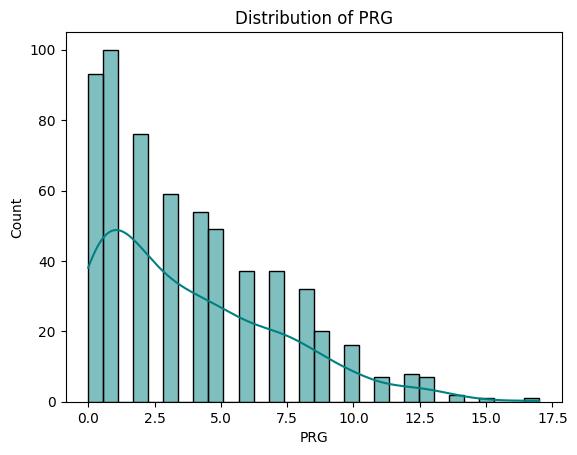

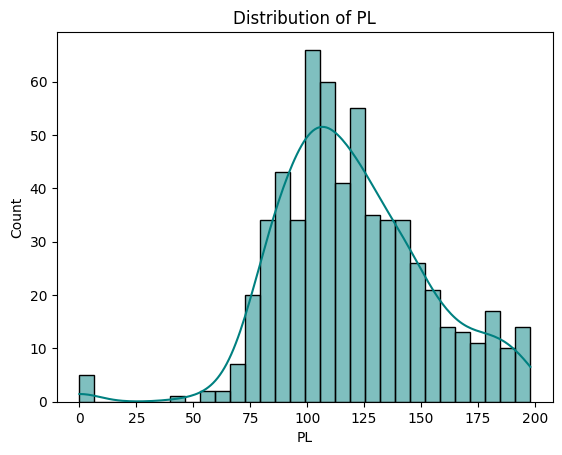

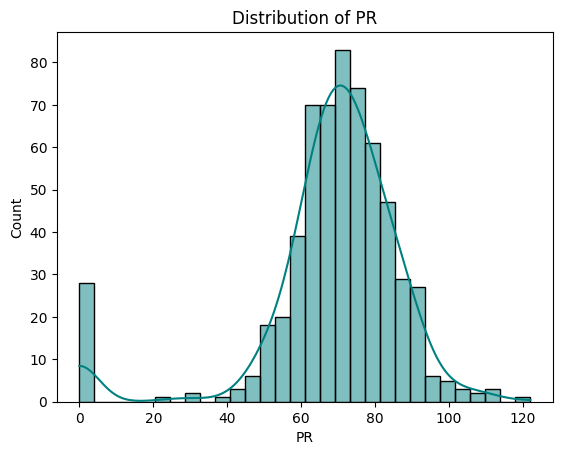

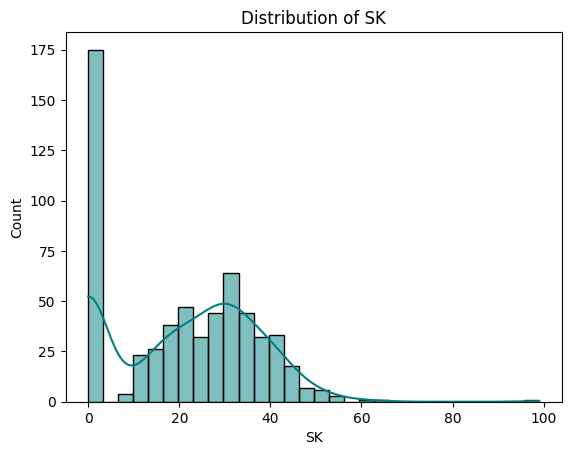

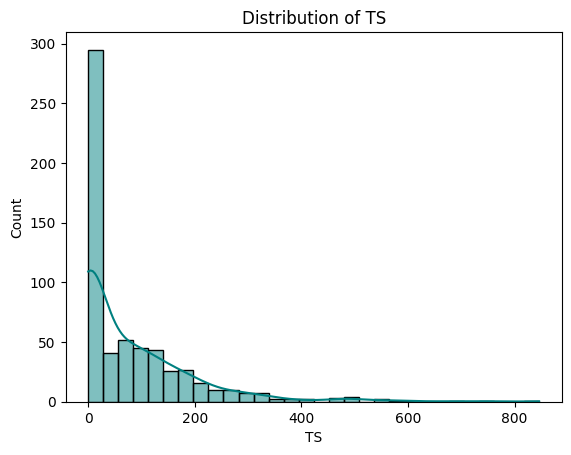

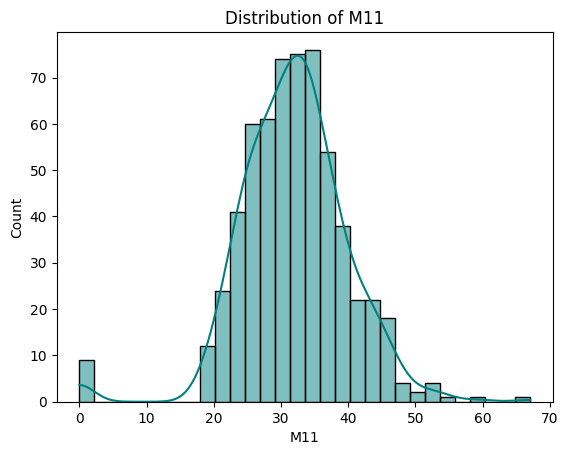

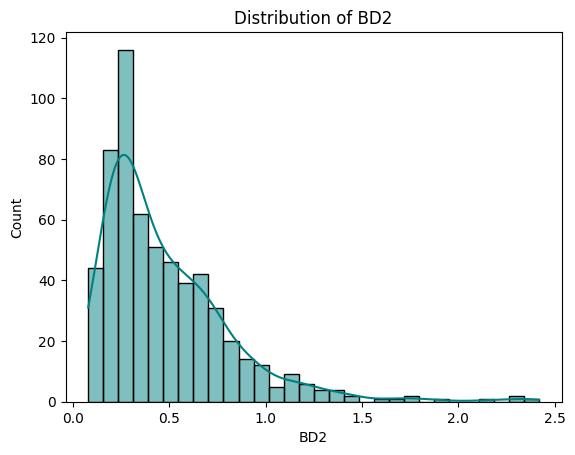

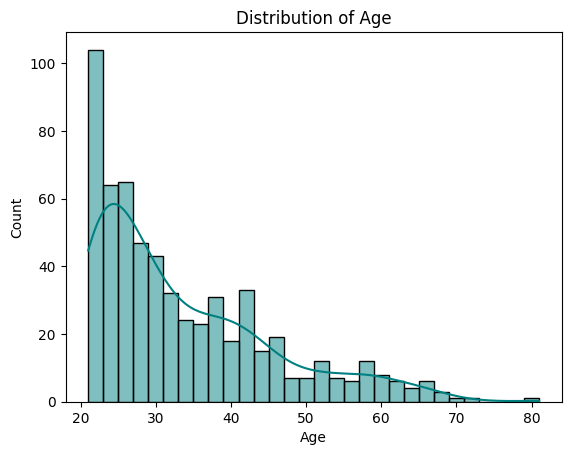

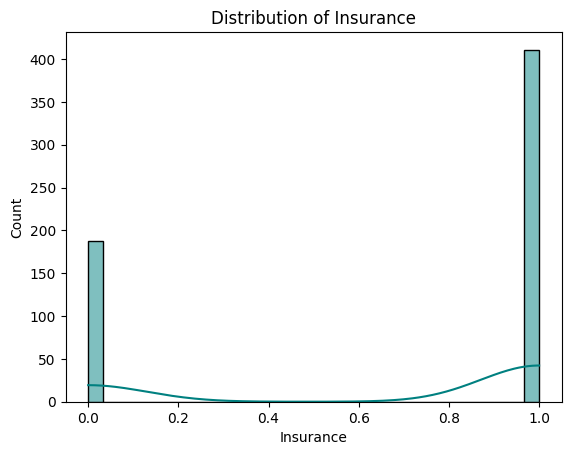

In [44]:
# Univariate analysis
# Numeric features distribution
num_cols = train_df.select_dtypes(include=["int64", "float64"]).columns
for col in num_cols:
    plt.figure()
    sns.histplot(train_df[col], kde=True, bins=30, color="teal")
    plt.title(f"Distribution of {col}")
    plt.show()


/tmp/ipython-input-147539680.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df["Sepssis"], order=train_df["Sepssis"].value_counts().index, palette="viridis")


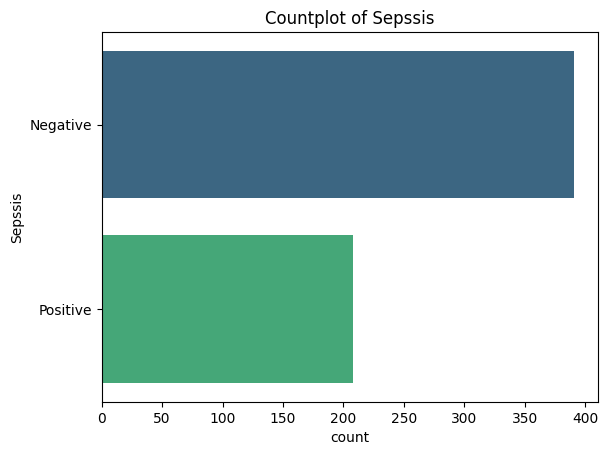

In [45]:
# Categorical features counts
plt.figure()
sns.countplot(y=train_df["Sepssis"], order=train_df["Sepssis"].value_counts().index, palette="viridis")
plt.title("Countplot of Sepssis")
plt.show()


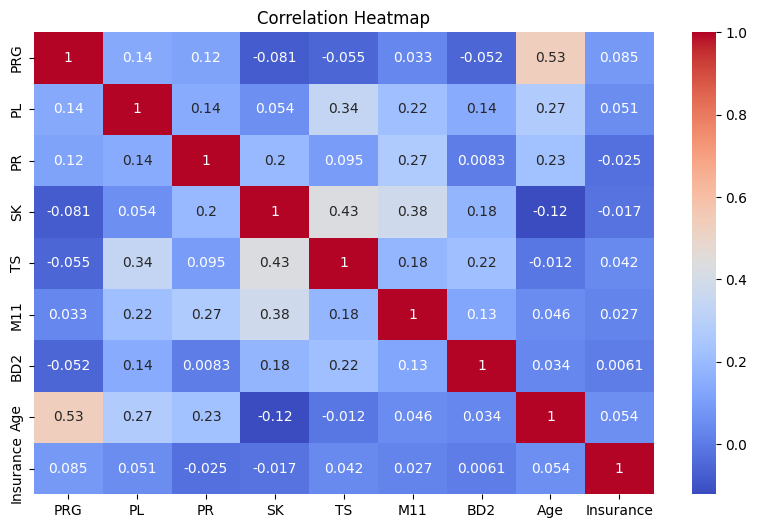

In [46]:
# Step 5: Bivariate / Multivariate analysis

# Correlation heatmap for numerical columns
plt.figure(figsize=(10,6))
sns.heatmap(train_df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


/tmp/ipython-input-2981799681.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)


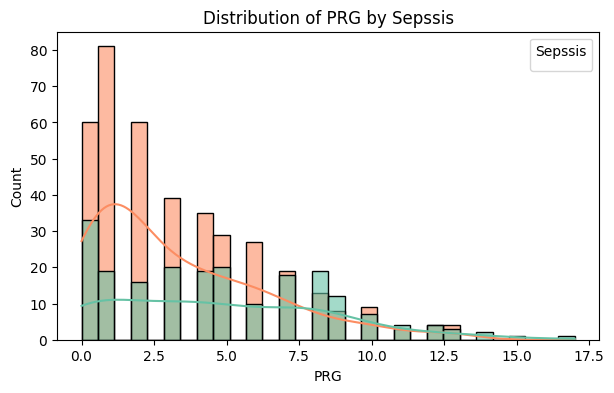

/tmp/ipython-input-2981799681.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)


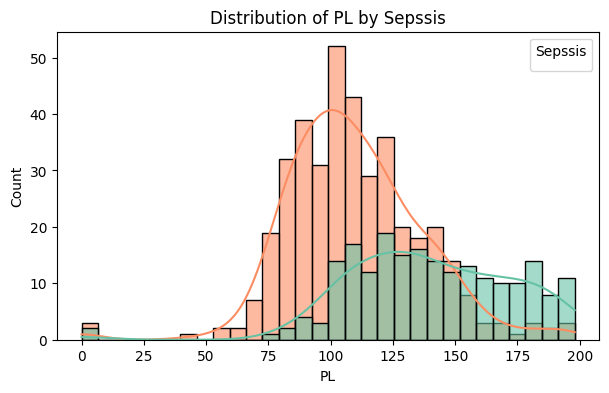

/tmp/ipython-input-2981799681.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)


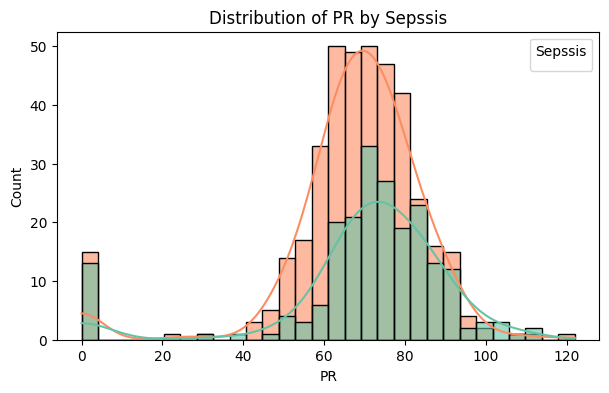

/tmp/ipython-input-2981799681.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)


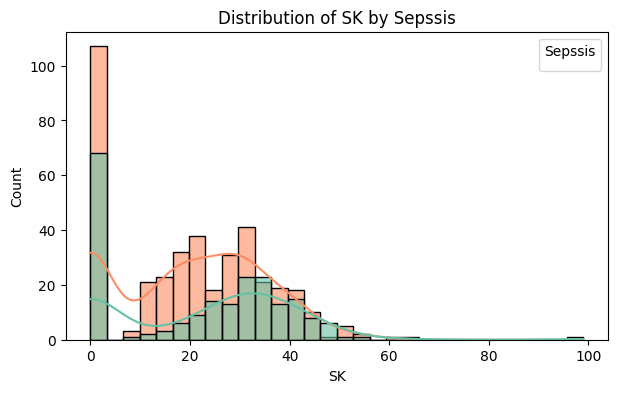

/tmp/ipython-input-2981799681.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)


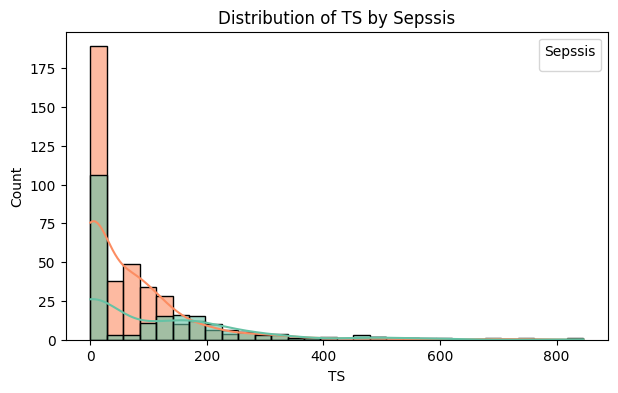

/tmp/ipython-input-2981799681.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)


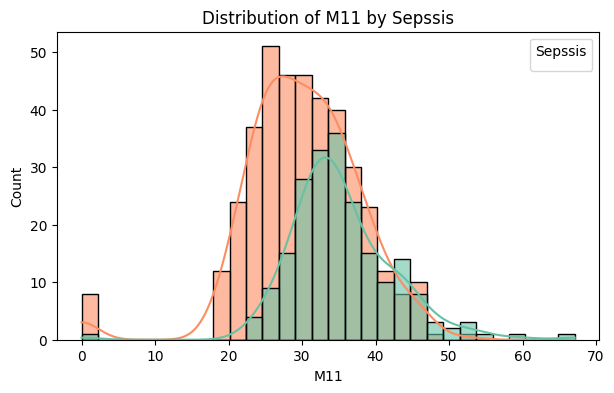

/tmp/ipython-input-2981799681.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)


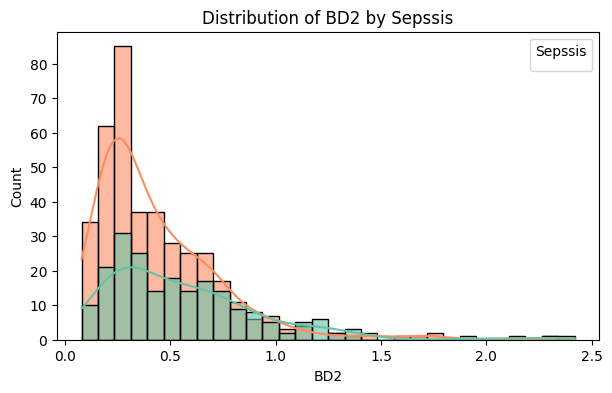

/tmp/ipython-input-2981799681.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)


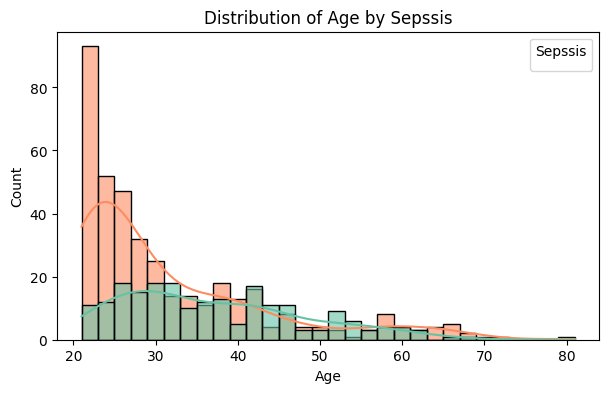

/tmp/ipython-input-2981799681.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)


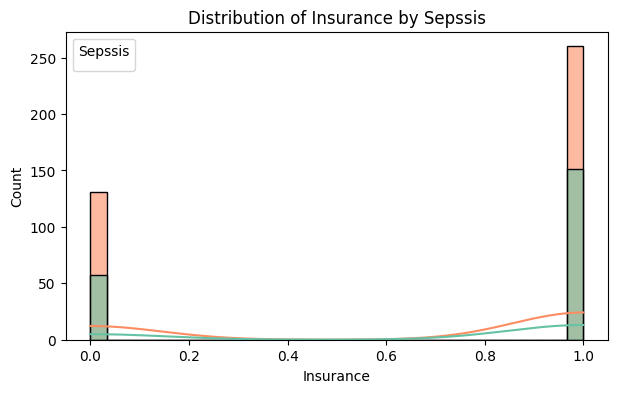

In [47]:
# Group comparison
target = "Sepssis"
if target in train_df.columns:
    for col in num_cols:
        plt.figure(figsize=(7,4))

        # Plot histogram with hue = target
        sns.histplot(data=train_df, x=col, hue=target, kde=True, bins=30, palette="Set2", alpha=0.6)

        plt.title(f"Distribution of {col} by {target}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.legend(title=target)
        plt.show()

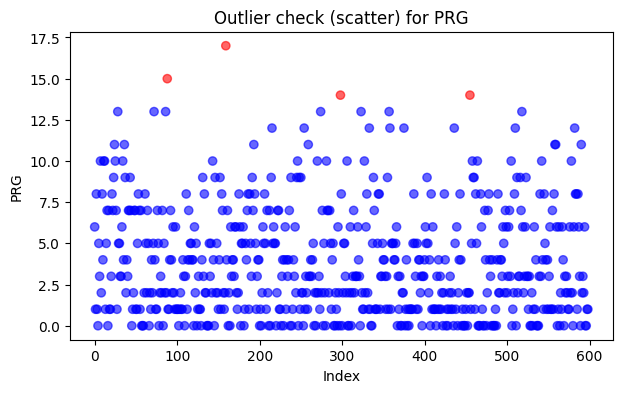

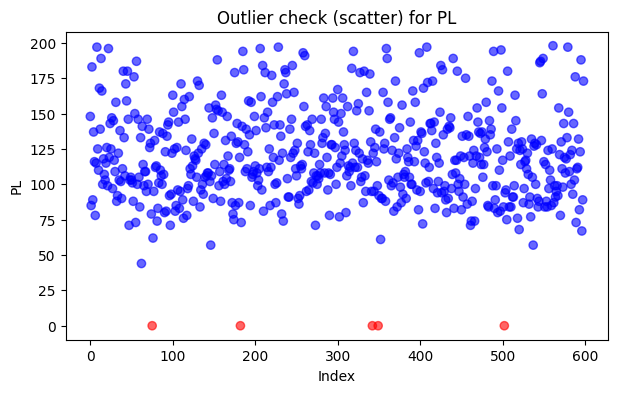

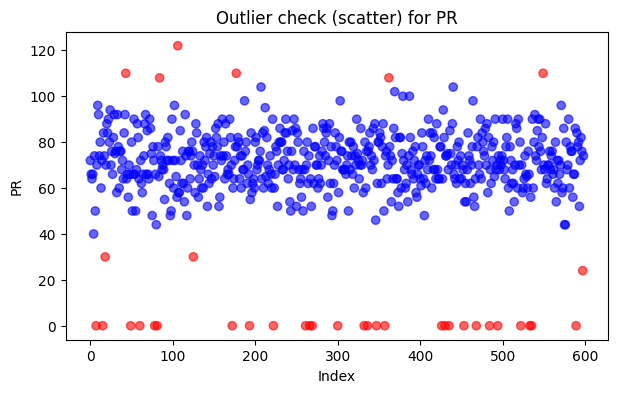

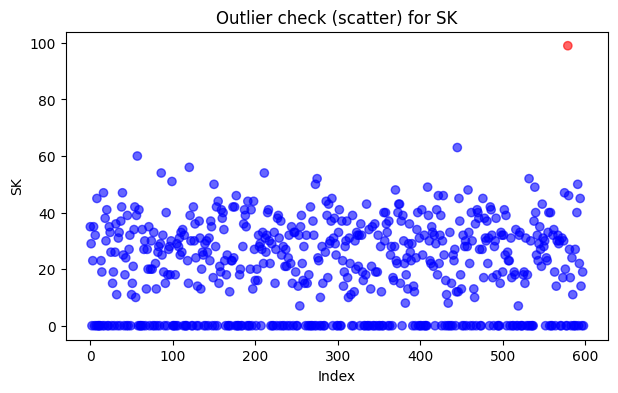

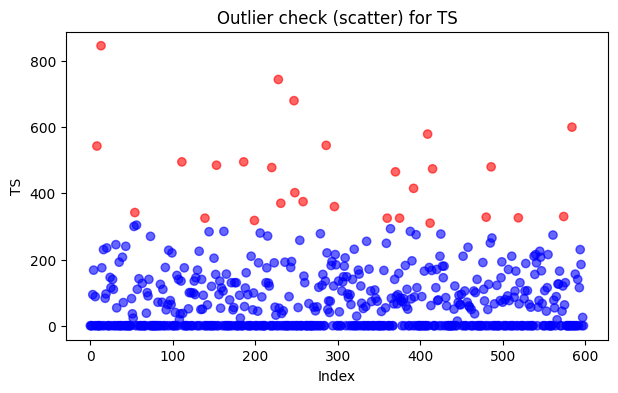

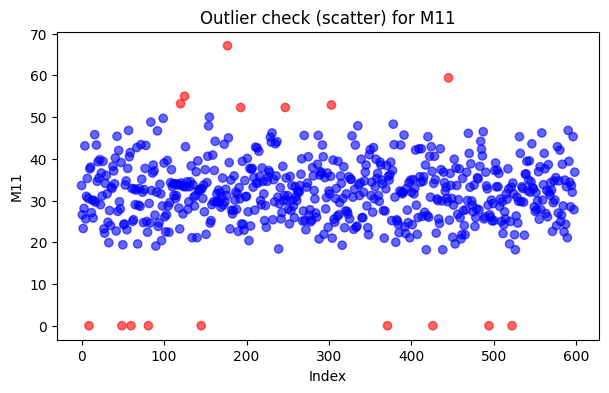

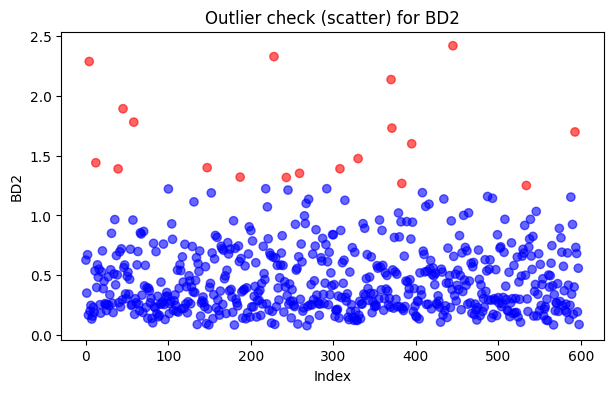

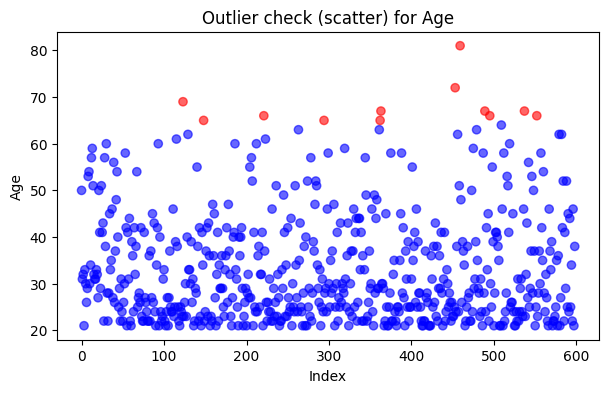

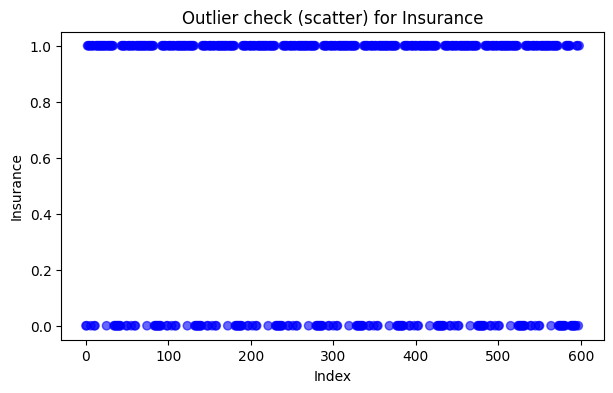

In [48]:
# Step 6: Outlier detection

# Scatter plot highlighting outliers
for col in num_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

    plt.figure(figsize=(7,4))
    plt.scatter(range(len(train_df)), train_df[col],
                c=['red' if (x < lower or x > upper) else 'blue' for x in train_df[col]], alpha=0.6)
    plt.title(f"Outlier check (scatter) for {col}")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.show()



In [49]:
#
# Drop the ID column before encoding
if "ID" in train_df.columns:
    train_df = train_df.drop("ID", axis=1)

In [50]:
# List all columns
print(train_df.columns.tolist())


['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance', 'Sepssis']


In [51]:
# Map target column
# Convert Sepssis to numeric
train_df["Sepssis"] = train_df["Sepssis"].map({"Positive": 1, "Negative": 0})

# Check conversion
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepssis    599 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 46.9 KB


In [52]:
# train dataset preview
train_df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [53]:
# Drop ID in test set
if "ID" in test_df.columns:
    test_df = test_df.drop("ID", axis=1)


In [54]:
# Align test set columns with training set (fill missing columns with 0)
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        169 non-null    int64  
 1   PL         169 non-null    int64  
 2   PR         169 non-null    int64  
 3   SK         169 non-null    int64  
 4   TS         169 non-null    int64  
 5   M11        169 non-null    float64
 6   BD2        169 non-null    float64
 7   Age        169 non-null    int64  
 8   Insurance  169 non-null    int64  
 9   Sepssis    169 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 13.3 KB


In [58]:
# Split the train dataset into train set(80%) and validation set(20%)
target_col = "Sepssis"
X = train_df.drop(target_col, axis=1)
y = train_df[target_col]

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("X_train shape:", X_train.shape)
print("X_val Shape:", X_val.shape)
print("y_train Shape:", y_train.shape)
print("y_val Shape:", y_val.shape)

X_train shape: (479, 9)
X_val Shape: (120, 9)
y_train Shape: (479,)
y_val Shape: (120,)


In [59]:
# Define the models
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


In [61]:
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    results[name] = acc

    print(f"=== {name} ===")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    print("\n")


=== RandomForest ===
Accuracy: 0.7083333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78        78
           1       0.59      0.57      0.58        42

    accuracy                           0.71       120
   macro avg       0.68      0.68      0.68       120
weighted avg       0.71      0.71      0.71       120

Confusion Matrix:
 [[61 17]
 [18 24]]


=== LogisticRegression ===
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        78
           1       0.64      0.64      0.64        42

    accuracy                           0.75       120
   macro avg       0.73      0.73      0.73       120
weighted avg       0.75      0.75      0.75       120

Confusion Matrix:
 [[63 15]
 [15 27]]


=== XGBoost ===
Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           0     

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:10:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [63]:
# Define models and parameter grids
# Custom scorer to maximize recall for positive class
recall_scorer = make_scorer(recall_score, pos_label=1)

# Random Forest parameter grid
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# XGBoost parameter grid
xgb_params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "subsample": [0.8, 1]
}


In [64]:
# GridSearchCV for Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       rf_params,
                       scoring=recall_scorer,
                       cv=3,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

print("Best RF params:", grid_rf.best_params_)
print("Best RF recall (positive class):", grid_rf.best_score_)


Best RF params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RF recall (positive class): 0.5546536796536796


In [65]:
# GridSearchCV for XGBoost
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        xgb_params,
                        scoring=recall_scorer,
                        cv=3,
                        n_jobs=-1)

grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

print("Best XGB params:", grid_xgb.best_params_)
print("Best XGB recall (positive class):", grid_xgb.best_score_)


Best XGB params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Best XGB recall (positive class): 0.5904761904761905


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:20:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [66]:
# Evaluate tuned models vs Logistic Regression
# Logistic Regression (already trained)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

models_to_compare = {
    "LogisticRegression": log_reg,
    "RandomForest_Tuned": best_rf,
    "XGBoost_Tuned": best_xgb
}

for name, model in models_to_compare.items():
    y_pred = model.predict(X_val)
    rec = recall_score(y_val, y_pred)
    print(f"{name} - Recall (positive class): {rec:.3f}")


LogisticRegression - Recall (positive class): 0.643
RandomForest_Tuned - Recall (positive class): 0.548
XGBoost_Tuned - Recall (positive class): 0.548


In [70]:
# Make sure Sepssis column is not in features
if "Sepssis" in test_df.columns:
    X_test = test_df.drop("Sepssis", axis=1)
else:
    X_test = test_df.copy()

# Make predictions with your Logistic Regression model
y_test_pred = log_reg.predict(X_test)


In [74]:
# Store predictions in a new DataFrame
SepssisPredictions_df = pd.DataFrame({"Predicted_Sepssis": y_test_pred})

# Preview
SepssisPredictions_df.head()

,Predicted_Sepssis
0,0
1,0
2,0
3,0
4,1


In [72]:
# Save the trained Logistic Regression model
joblib.dump(log_reg, "sepssis_model.pkl")
print("✅ Logistic Regression model saved as 'sepssis_model.pkl'")

✅ Logistic Regression model saved as 'sepssis_model.pkl'


In [77]:
#
print("X_train features:"), X_train.info()

X_train features:
<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 161 to 395
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        479 non-null    int64  
 1   PL         479 non-null    int64  
 2   PR         479 non-null    int64  
 3   SK         479 non-null    int64  
 4   TS         479 non-null    int64  
 5   M11        479 non-null    float64
 6   BD2        479 non-null    float64
 7   Age        479 non-null    int64  
 8   Insurance  479 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 37.4 KB


(None, None)